# **Applied Data Science Capstone Project**
## Jessica Beamer
# **Introduction**

### Overview
San Antonio, TX is a diverse city that is seeing continued growth, and the surrounding areas are also experiencing an increase in development. It was recently ranked as one of the fastest growing cities in the United States. The intent of this project is to identify areas in north San Antonio, TX and the surrounding area that would be ideal for opening a restaurant. We will explore the current offerings and review the potential for future business endeavors. This analysis would be particularly helpful for a restaurateur who is interested in starting or expanding their business. 
### Business Problem
The objective is to find the ideal location for a restaurateur to open a new restaurant in north San Antonio or the surrounding area.

# **Data**
### Major neighborhoods/ sub areas around north San Antonio
We will identify the areas to explore after reviewing the map (produced with Folium) and then create a dataframe that includes the neighborhood name, along with the latitude and longitude that are obtained with the Geocoder package.
### Venue data for the slected areas
We will be exploring the venue category by neighborhood. We will use the Foursquare API to obtain venue data related to these neighborhoods/ sub-areas. 

In [1]:
## Importing required libraries
import requests
import numpy as np 
import pandas as pd
import csv
## Needed for the geo piece
import io

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


## Reviewing the map to isolate areas close to north San Antonio for further exploration

In [2]:
address = 'San Antonio, TX'

geolocator = Nominatim(user_agent="TX_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Antonio, TX are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Antonio, TX are 29.4246002, -98.4951405.


In [3]:
san_map=folium.Map(location=[latitude, longitude], zoom_start=10)
san_map

## Using the Geocoder package to find the latitude and longitude & create the dataframe

In [4]:
lv_address = 'Leon Valley, TX'

lv_geolocator = Nominatim(user_agent="TX_explorer")
lv_location = lv_geolocator.geocode(lv_address)
lv_latitude = lv_location.latitude
lv_longitude = lv_location.longitude
print('The geograpical coordinate of Leon Valley, TX are {}, {}.'.format(lv_latitude, lv_longitude))

b_address = 'Boerne, TX'

b_geolocator = Nominatim(user_agent="TX_explorer")
b_location = b_geolocator.geocode(b_address)
b_latitude = b_location.latitude
b_longitude = b_location.longitude
print('The geograpical coordinate of Boerne, TX are {}, {}.'.format(b_latitude, b_longitude))

h_address = 'Helotes, TX'

h_geolocator = Nominatim(user_agent="TX_explorer")
h_location = h_geolocator.geocode(h_address)
h_latitude = h_location.latitude
h_longitude = h_location.longitude
print('The geograpical coordinate of Helotes, TX are {}, {}.'.format(h_latitude, h_longitude))

cv_address = 'Converse, TX'

cv_geolocator = Nominatim(user_agent="TX_explorer")
cv_location = cv_geolocator.geocode(cv_address)
cv_latitude = cv_location.latitude
cv_longitude = cv_location.longitude
print('The geograpical coordinate of Converse, TX are {}, {}.'.format(cv_latitude, cv_longitude))

sz_address = 'Schertz, TX'

sz_geolocator = Nominatim(user_agent="TX_explorer")
sz_location = sz_geolocator.geocode(sz_address)
sz_latitude = sz_location.latitude
sz_longitude = sz_location.longitude
print('The geograpical coordinate of Schertz, TX are {}, {}.'.format(sz_latitude, sz_longitude))

bv_address = 'Bulverde, TX'

bv_geolocator = Nominatim(user_agent="TX_explorer")
bv_location = bv_geolocator.geocode(bv_address)
bv_latitude = bv_location.latitude
bv_longitude = bv_location.longitude
print('The geograpical coordinate of Bulverde, TX are {}, {}.'.format(bv_latitude, bv_longitude))

bd_address = 'Bandera, TX'

bd_geolocator = Nominatim(user_agent="TX_explorer")
bd_location = bd_geolocator.geocode(bd_address)
bd_latitude = bd_location.latitude
bd_longitude = bd_location.longitude
print('The geograpical coordinate of Bandera, TX are {}, {}.'.format(bd_latitude, bd_longitude))

wc_address = 'Windcrest, TX'

wc_geolocator = Nominatim(user_agent="TX_explorer")
wc_location = wc_geolocator.geocode(wc_address)
wc_latitude = wc_location.latitude
wc_longitude = wc_location.longitude
print('The geograpical coordinate of Windcrest, TX are {}, {}.'.format(wc_latitude, wc_longitude))

nb_address = 'New Braunfels, TX'

nb_geolocator = Nominatim(user_agent="TX_explorer")
nb_location = nb_geolocator.geocode(nb_address)
nb_latitude = nb_location.latitude
nb_longitude = nb_location.longitude
print('The geograpical coordinate of New Braunfels, TX are {}, {}.'.format(nb_latitude, nb_longitude))

so_address = 'Stone Oak, TX'

so_geolocator = Nominatim(user_agent="TX_explorer")
so_location = so_geolocator.geocode(so_address)
so_latitude = so_location.latitude
so_longitude = so_location.longitude
print('The geograpical coordinate of New Braunfels, TX are {}, {}.'.format(so_latitude, so_longitude))

The geograpical coordinate of Leon Valley, TX are 29.4952307, -98.6186317.
The geograpical coordinate of Boerne, TX are 29.7946641, -98.7319703.
The geograpical coordinate of Helotes, TX are 29.5635688, -98.6884208.
The geograpical coordinate of Converse, TX are 29.5180081, -98.3161241.
The geograpical coordinate of Schertz, TX are 29.5641617, -98.2695702.
The geograpical coordinate of Bulverde, TX are 29.7438332, -98.4530729.
The geograpical coordinate of Bandera, TX are 29.7643475, -99.234526.
The geograpical coordinate of Windcrest, TX are 29.515508, -98.3802925.
The geograpical coordinate of New Braunfels, TX are 29.7028266, -98.1257348.
The geograpical coordinate of New Braunfels, TX are 29.6493885, -98.4513456.


In [103]:
data = [[so_address, so_latitude, so_longitude], [nb_address, nb_latitude, nb_longitude],[lv_address, lv_latitude, lv_longitude],[h_address, h_latitude, h_longitude], [sz_address, sz_latitude, sz_longitude], [b_address, b_latitude, b_longitude],[cv_address, cv_latitude, cv_longitude],[bv_address, bv_latitude, bv_longitude], [wc_address, wc_latitude, wc_longitude]]

In [104]:
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Neighborhood', 'Latitude', 'Longitude']) 
df

,Neighborhood,Latitude,Longitude
0,"Stone Oak, TX",29.649389,-98.451346
1,"New Braunfels, TX",29.702827,-98.125735
2,"Leon Valley, TX",29.495231,-98.618632
3,"Helotes, TX",29.563569,-98.688421
4,"Schertz, TX",29.564162,-98.269570
5,"Boerne, TX",29.794664,-98.731970
6,"Converse, TX",29.518008,-98.316124
7,"Bulverde, TX",29.743833,-98.453073
8,"Windcrest, TX",29.515508,-98.380292


In [7]:
#### Create a map of San Antonio with neighborhoods superimposed on top.
map_sanantonio = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanantonio)  
    
map_sanantonio

## Use the Foursquare API to find the categories of venues found in each neighborhood

In [8]:
CLIENT_ID = 'JBHAZZZP4J1PTULQ4FZOF2G5J5CXZK1NRJHQYAGB2CQCLQAF' # your Foursquare ID
CLIENT_SECRET = '2RM3S3PP11EYE0MACTQIM1X2RSZNTAYMBIV00C5NPP05VZHE' # your Foursquare Secret
VERSION = '20200725' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JBHAZZZP4J1PTULQ4FZOF2G5J5CXZK1NRJHQYAGB2CQCLQAF
CLIENT_SECRET:2RM3S3PP11EYE0MACTQIM1X2RSZNTAYMBIV00C5NPP05VZHE


In [41]:
### Let's create a function to repeat the same process to all the neighborhoods

LIMIT= 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
## Create a new DF for San Antonio Venues

sanantonio_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Bandera, TX
Stone Oak, TX
New Braunfels, TX
Leon Valley, TX
Helotes, TX
Schertz, TX
Boerne, TX
Converse, TX
Bulverde, TX
Windcrest, TX


In [43]:
## Let's check how many venues were returned for each neighborhood
sanantonio_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Boerne, TX",19,19,19,19,19,19
"Bulverde, TX",4,4,4,4,4,4
"Converse, TX",10,10,10,10,10,10
"Helotes, TX",12,12,12,12,12,12
"Leon Valley, TX",17,17,17,17,17,17
"New Braunfels, TX",41,41,41,41,41,41
"Schertz, TX",5,5,5,5,5,5
"Stone Oak, TX",36,36,36,36,36,36
"Windcrest, TX",3,3,3,3,3,3


In [16]:
print('There are {} uniques categories.'.format(len(sanantonio_venues['Venue'].unique())))

There are 141 uniques categories.


In [17]:
sanantonio_venues.shape

(147, 7)

## Review the unique categories and category counts for the entire area

In [44]:
print('There are {} uniques categories.'.format(len(sanantonio_venues['Venue Category'].unique())))
sanantonio_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 83 uniques categories.


Venue Category
American Restaurant           8
Fast Food Restaurant          6
Ice Cream Shop                6
Bar                           5
Clothing Store                4
Mexican Restaurant            4
Discount Store                3
Wine Bar                      3
Pub                           3
Plaza                         3
Hotel                         3
Boutique                      3
Bakery                        3
Accessories Store             3
Gift Shop                     3
Gymnastics Gym                2
Gourmet Shop                  2
Italian Restaurant            2
Women's Store                 2
Gas Station                   2
Cosmetics Shop                2
Burger Joint                  2
Breakfast Spot                2
Bistro                        2
Bank                          2
Market                        2
German Restaurant             2
Mobile Phone Shop             2
Pizza Place                   2
Steakhouse                    2
Video Store              

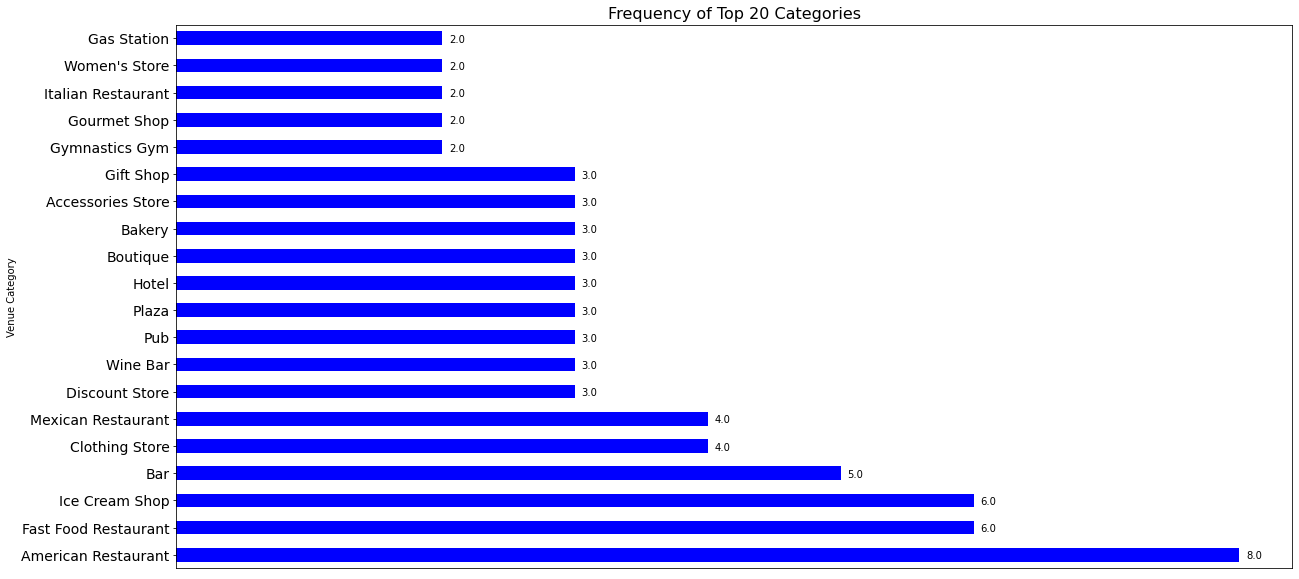

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= sanantonio_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(20, 10),stacked=True, color='blue',legend=False,fontsize=14)
ax.set_title("Frequency of Top 20 Categories",fontsize=16)
ax.set_facecolor(('w'))
ax.xaxis.set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_width()),(p.get_width()+.05, p.get_y()+.10),fontsize=10,color='black')
plt.show()

In [19]:
sanantonio_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Stone Oak, TX",29.649389,-98.451346,BJ's Restaurant & Brewhouse,29.649476,-98.448533,American Restaurant
1,"Stone Oak, TX",29.649389,-98.451346,In-N-Out Burger,29.647961,-98.449912,Fast Food Restaurant
2,"Stone Oak, TX",29.649389,-98.451346,Mod Pizza,29.646256,-98.450444,Pizza Place
3,"Stone Oak, TX",29.649389,-98.451346,Olive Garden,29.650681,-98.451165,Italian Restaurant
4,"Stone Oak, TX",29.649389,-98.451346,LongHorn Steakhouse,29.649747,-98.451736,Steakhouse


In [20]:
# one hot encoding
sanantonio_onehot = pd.get_dummies(sanantonio_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sanantonio_onehot['Neighborhood'] = sanantonio_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sanantonio_onehot.columns[-1]] + list(sanantonio_onehot.columns[:-1])
sanantonio_onehot = sanantonio_onehot[fixed_columns]

sanantonio_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Antique Shop,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Garden,Bistro,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Dessert Shop,Discount Store,Dive Bar,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Gymnastics Gym,History Museum,Hotel,Ice Cream Shop,Indie Theater,Italian Restaurant,Juice Bar,Locksmith,Market,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Other Repair Shop,Park,Pawn Shop,Pharmacy,Pizza Place,Plaza,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Sports Bar,Steakhouse,Tea Room,Tex-Mex Restaurant,Thrift / Vintage Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Wine Bar,Women's Store
0,"Stone Oak, TX",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Stone Oak, TX",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Stone Oak, TX",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Stone Oak, TX",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Stone Oak, TX",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Continuing to Review the Foursquare Data

In [53]:
sanantonioCategory_Percent=sanantonio_onehot.groupby('Neighborhood').mean()*100

In [54]:
sanantonioCategory_Percent.head()

,ATM,Accessories Store,Airport,American Restaurant,Antique Shop,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Garden,Bistro,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Dessert Shop,Discount Store,Dive Bar,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Gymnastics Gym,History Museum,Hotel,Ice Cream Shop,Indie Theater,Italian Restaurant,Juice Bar,Locksmith,Market,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Other Repair Shop,Park,Pawn Shop,Pharmacy,Pizza Place,Plaza,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Sports Bar,Steakhouse,Tea Room,Tex-Mex Restaurant,Thrift / Vintage Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Wine Bar,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Boerne, TX",0.0,0.0,0.0,10.526316,0.0,0.000000,0.000000,0.0,5.263158,0.0,0.000000,0.0,0.0,5.263158,10.526316,0.0,0.0,0.0,5.263158,0.0,5.263158,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.263158,0.0,0.000000,0.0,0.0,0.000000,5.263158,0.0,0.0,0.0,5.263158,0.000000,0.0,0.0,5.263158,0.0,5.263158,0.0,0.0,5.263158,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.263158,0.000000,0.000000,5.263158,0.000000,0.000000,0.0,0.0,0.0,5.263158,0.0,0.0,0.0,0.000000,0.0,0.000000,5.263158,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,5.263158,0.0
"Bulverde, TX",0.0,0.0,25.0,25.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,25.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,25.000000,0.0
"Converse, TX",0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,10.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,10.0,0.000000,0.000000,0.0,0.0,0.0,10.0,10.0,0.0,0.000000,0.0,0.000000,10.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,10.000000,0.0,0.0,0.000000,0.0,0.000000,10.0,0.0,0.000000,10.000000,0.0,10.0,0.0,10.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
"Helotes, TX",0.0,0.0,0.0,8.333333,0.0,0.000000,0.000000,0.0,0.000000,0.0,8.333333,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,8.333333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,16.666667,0.0,0.0,8.333333,0.000000,0.0,0.0,0.0,0.000000,8.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,8.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,8.333333,0.000000,0.0,0.0,0.000000,0.0,0.0,8.333333,8.333333,0.0,0.0,0.000000,0.0
"Leon Valley, TX",0.0,0.0,0.0,0.000000,0.0,5.882353,5.882353,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,5.882353,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,17.647059,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,17.647059,0.0,0.0,0.0,0.0,0.0,0.0,5.882353,5.882353,5.882353,0.000000,5.882353,5.882353,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,5.882353,0.0,0.000000,0.000000,0.0,0.0,5.882353,0.0,0.0,5.882353,0.000000,0.0,0.0,0.000000,0.0


In [55]:
venue_Percent=sanantonioCategory_Percent.transpose()

In [57]:
venue_Percent

Neighborhood,"Boerne, TX","Bulverde, TX","Converse, TX","Helotes, TX","Leon Valley, TX","New Braunfels, TX","Schertz, TX","Stone Oak, TX","Windcrest, TX"
ATM,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,2.777778,0.000000
Accessories Store,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.333333,0.000000
Airport,0.000000,25.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
American Restaurant,10.526316,25.0,0.0,8.333333,0.000000,4.878049,0.0,5.555556,0.000000
Antique Shop,0.000000,0.0,0.0,0.000000,0.000000,2.439024,0.0,0.000000,0.000000
Asian Restaurant,0.000000,0.0,0.0,0.000000,5.882353,0.000000,0.0,0.000000,0.000000
Automotive Shop,0.000000,0.0,0.0,0.000000,5.882353,0.000000,0.0,0.000000,0.000000
BBQ Joint,0.000000,0.0,10.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Bakery,5.263158,0.0,0.0,0.000000,0.000000,2.439024,20.0,0.000000,0.000000
Bank,0.000000,0.0,0.0,0.000000,0.000000,2.439024,0.0,2.777778,0.000000


In [45]:
venue_counts = sanantonio_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,ATM,Accessories Store,Airport,American Restaurant,Antique Shop,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Garden,Bistro,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Dessert Shop,Discount Store,Dive Bar,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Gymnastics Gym,History Museum,Hotel,Ice Cream Shop,Indie Theater,Italian Restaurant,Juice Bar,Locksmith,Market,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Other Repair Shop,Park,Pawn Shop,Pharmacy,Pizza Place,Plaza,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Sports Bar,Steakhouse,Tea Room,Tex-Mex Restaurant,Thrift / Vintage Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Wine Bar,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Boerne, TX",0,0,0,2,0,0,0,0,1,0,0,0,0,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
"Bulverde, TX",0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
"Converse, TX",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Helotes, TX",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
"Leon Valley, TX",0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [46]:
venue_counts_described = venue_counts.describe().transpose()
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Bar,9.0,0.555556,1.333333,0.0,0.0,0.0,0.0,4.0
Pub,9.0,0.333333,1.000000,0.0,0.0,0.0,0.0,3.0
Ice Cream Shop,9.0,0.666667,1.000000,0.0,0.0,0.0,1.0,3.0
Accessories Store,9.0,0.333333,1.000000,0.0,0.0,0.0,0.0,3.0
Fast Food Restaurant,9.0,0.666667,1.118034,0.0,0.0,0.0,1.0,3.0
Clothing Store,9.0,0.444444,1.013794,0.0,0.0,0.0,0.0,3.0
German Restaurant,9.0,0.222222,0.666667,0.0,0.0,0.0,0.0,2.0
Boutique,9.0,0.333333,0.707107,0.0,0.0,0.0,0.0,2.0
Sandwich Place,9.0,0.222222,0.666667,0.0,0.0,0.0,0.0,2.0
Plaza,9.0,0.333333,0.707107,0.0,0.0,0.0,0.0,2.0


In [47]:
venue_top10_list = venue_top10.index.values.tolist()

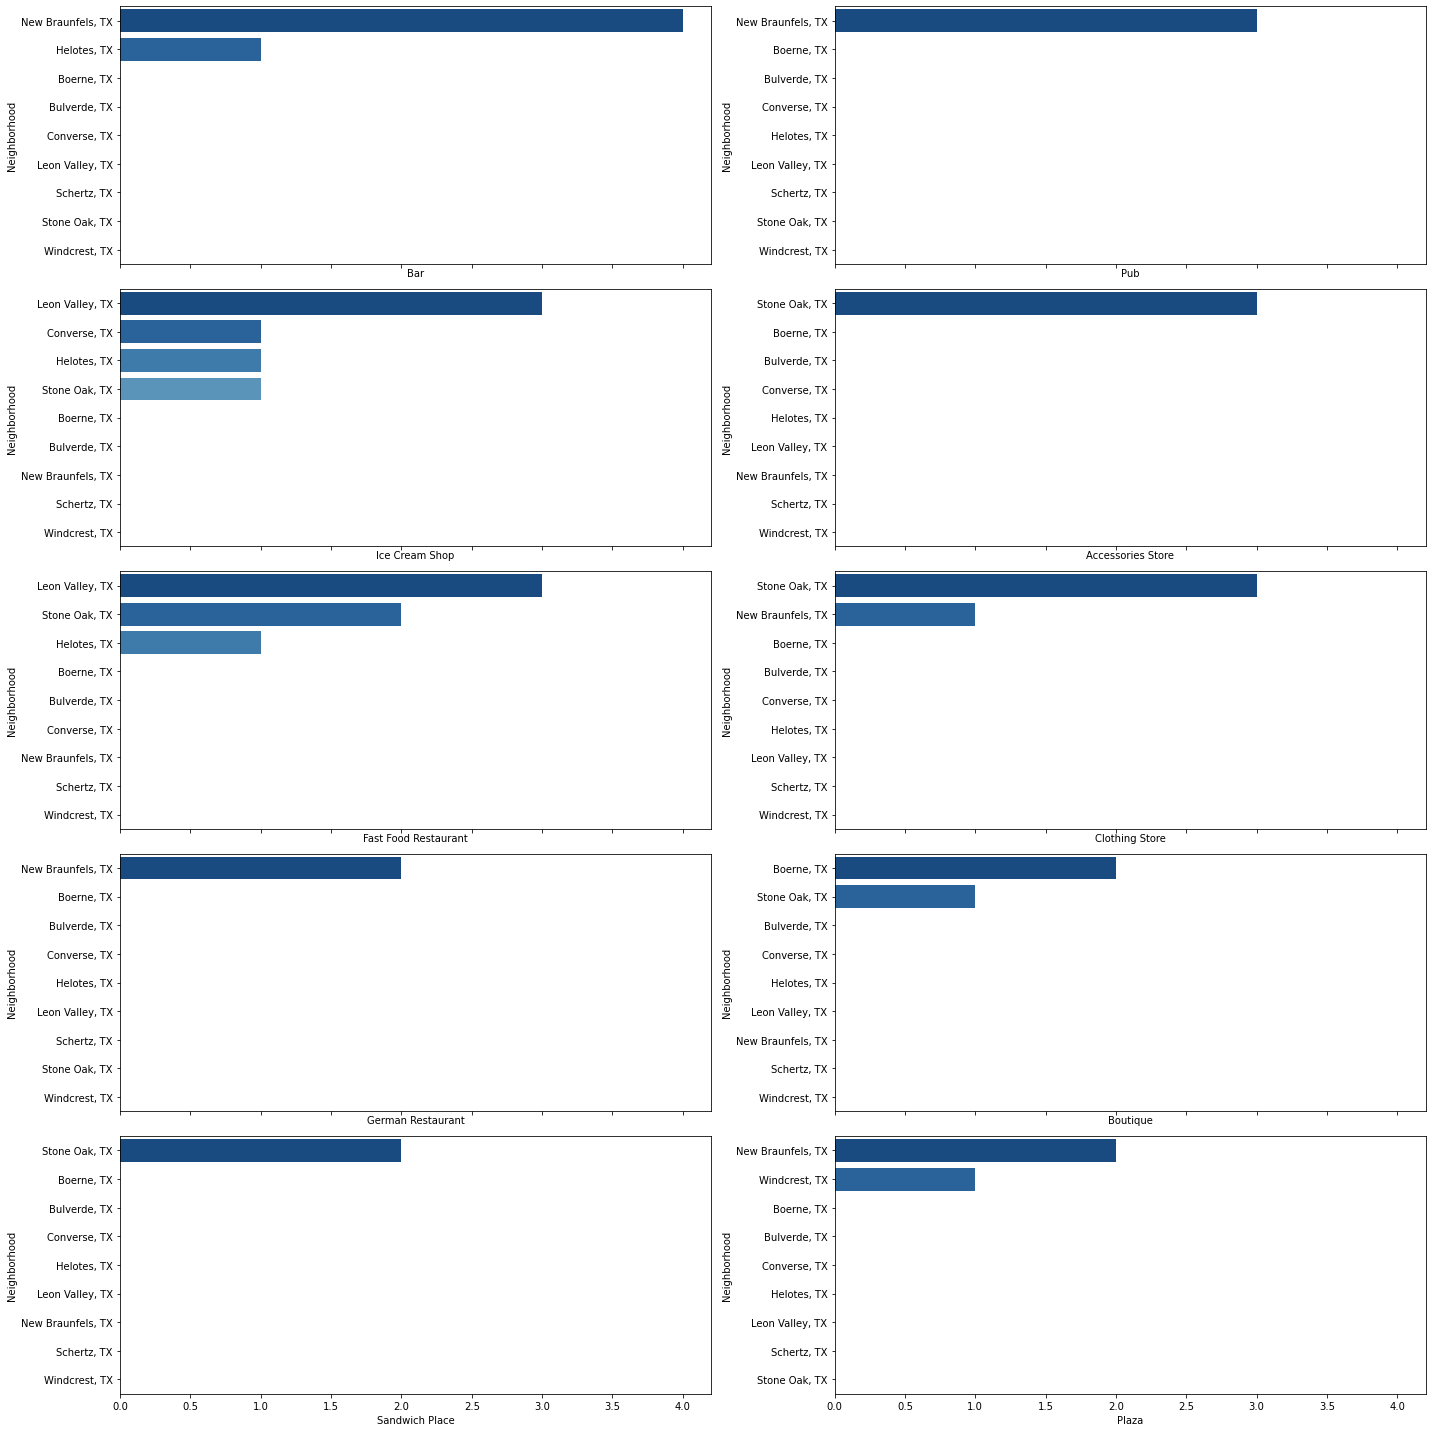

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

In [21]:
sanantonio_grouped = sanantonio_onehot.groupby('Neighborhood').mean().reset_index()
sanantonio_grouped

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Antique Shop,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Garden,Bistro,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Dessert Shop,Discount Store,Dive Bar,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Gymnastics Gym,History Museum,Hotel,Ice Cream Shop,Indie Theater,Italian Restaurant,Juice Bar,Locksmith,Market,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Other Repair Shop,Park,Pawn Shop,Pharmacy,Pizza Place,Plaza,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Sports Bar,Steakhouse,Tea Room,Tex-Mex Restaurant,Thrift / Vintage Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Wine Bar,Women's Store
0,"Boerne, TX",0.000000,0.000000,0.00,0.105263,0.00000,0.000000,0.000000,0.0,0.052632,0.000000,0.000000,0.0,0.00000,0.052632,0.105263,0.000000,0.00000,0.00000,0.052632,0.0,0.052632,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.052632,0.00000,0.000000,0.0,0.00000,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.00000,0.052632,0.000000,0.052632,0.0,0.00000,0.052632,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.052632,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.052632,0.000000
1,"Bulverde, TX",0.000000,0.000000,0.25,0.250000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.250000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.250000,0.000000
2,"Converse, TX",0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.1,0.000000,0.000000,0.000000,0.00000,0.00000,0.1,0.1,0.000000,0.000000,0.00000,0.000000,0.1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.1,0.00000,0.000000,0.100000,0.00000,0.100000,0.000000,0.1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
3,"Helotes, TX",0.000000,0.000000,0.00,0.083333,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.083333,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.083333,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.166667,0.0,0.00000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.083333,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.083333,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.083333,0.083333,0.00000,0.0,0.000000,0.000000
4,"Leon Valley, TX",0.000000,0.000000,0.00,0.000000,0.00000,0.058824,0.058824,0.0,0.000000,0.000000,0.00

In [22]:
sanantonio_grouped.shape

(9, 84)

In [23]:
# Continue looking at top venues
num_top_venues = 5

for hood in sanantonio_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sanantonio_grouped[sanantonio_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Boerne, TX----
                    venue  freq
0                Boutique  0.11
1     American Restaurant  0.11
2  Furniture / Home Store  0.05
3              Restaurant  0.05
4                    Park  0.05


----Bulverde, TX----
                 venue  freq
0            Gift Shop  0.25
1              Airport  0.25
2  American Restaurant  0.25
3             Wine Bar  0.25
4            Locksmith  0.00


----Converse, TX----
                        venue  freq
0              Gymnastics Gym   0.1
1                    Dive Bar   0.1
2  Construction & Landscaping   0.1
3              Ice Cream Shop   0.1
4           Convenience Store   0.1


----Helotes, TX----
                  venue  freq
0        Discount Store  0.17
1              Pharmacy  0.08
2  Fast Food Restaurant  0.08
3   American Restaurant  0.08
4        Ice Cream Shop  0.08


----Leon Valley, TX----
                  venue  freq
0        Ice Cream Shop  0.18
1  Fast Food Restaurant  0.18
2    Chinese Restaurant  0.06
3    

In [25]:
# Put that into a pd df
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [156]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sanantonio_grouped['Neighborhood']

for ind in np.arange(sanantonio_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sanantonio_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Boerne, TX",Boutique,American Restaurant,Café,Burger Joint,Restaurant,Bistro,Hotel,Mexican Restaurant,Snack Place,Gourmet Shop
1,"Bulverde, TX",Wine Bar,Gift Shop,Airport,American Restaurant,Discount Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,"Converse, TX",Gas Station,BBQ Joint,Business Service,Construction & Landscaping,Convenience Store,Locksmith,Italian Restaurant,Dive Bar,Ice Cream Shop,Gymnastics Gym
3,"Helotes, TX",Discount Store,Pharmacy,Smoke Shop,Fast Food Restaurant,Ice Cream Shop,Burger Joint,Bar,Gas Station,Video Store,American Restaurant
4,"Leon Valley, TX",Fast Food Restaurant,Ice Cream Shop,Pawn Shop,Automotive Shop,Other Repair Shop,Pharmacy,Chinese Restaurant,Shoe Store,Mexican Restaurant,Mobile Phone Shop
5,"New Braunfels, TX",Bar,Pub,German Restaurant,American Restaurant,Market,Hotel,Plaza,Cocktail Bar,Gourmet Shop,Clothing Store
6,"Schertz, TX",Pizza Place,Baseball Field,Weight Loss Center,Gymnastics Gym,Bakery,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store
7,"Stone Oak, TX",Accessories Store,Clothing Store,Women's Store,American Restaurant,Sandwich Place,Cosmetics Shop,Fast Food Restaurant,Gastropub,Massage Studio,Juice Bar
8,"Windcrest, TX",Discount Store,Golf Course,Plaza,Frozen Yogurt Shop,Food Truck,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping


## Begin Clustering

In [160]:
sanantonio_grouped_clustering = sanantonio_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(sanantonio_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 2, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [161]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

san_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
san_merged = san_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

san_merged.head(10) # check the last columns!


ValueError: cannot insert Cluster Labels, already exists

In [146]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [147]:
neighborhoods_venues_sorted.head(10)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,"Boerne, TX",Boutique,American Restaurant,Café,Burger Joint,Restaurant,Bistro,Hotel,Mexican Restaurant,Snack Place,Gourmet Shop
1,2,"Bulverde, TX",Wine Bar,Gift Shop,Airport,American Restaurant,Discount Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,3,"Converse, TX",Gas Station,BBQ Joint,Business Service,Construction & Landscaping,Convenience Store,Locksmith,Italian Restaurant,Dive Bar,Ice Cream Shop,Gymnastics Gym
3,0,"Helotes, TX",Discount Store,Pharmacy,Smoke Shop,Fast Food Restaurant,Ice Cream Shop,Burger Joint,Bar,Gas Station,Video Store,American Restaurant
4,0,"Leon Valley, TX",Fast Food Restaurant,Ice Cream Shop,Pawn Shop,Automotive Shop,Other Repair Shop,Pharmacy,Chinese Restaurant,Shoe Store,Mexican Restaurant,Mobile Phone Shop
5,0,"New Braunfels, TX",Bar,Pub,German Restaurant,American Restaurant,Market,Hotel,Plaza,Cocktail Bar,Gourmet Shop,Clothing Store
6,4,"Schertz, TX",Pizza Place,Baseball Field,Weight Loss Center,Gymnastics Gym,Bakery,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store
7,0,"Stone Oak, TX",Accessories Store,Clothing Store,Women's Store,American Restaurant,Sandwich Place,Cosmetics Shop,Fast Food Restaurant,Gastropub,Massage Studio,Juice Bar
8,1,"Windcrest, TX",Discount Store,Golf Course,Plaza,Frozen Yogurt Shop,Food Truck,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping


In [148]:
df['Neighborhood'] = neighborhoods_venues_sorted['Neighborhood']
print(df.shape)
df.isnull().sum()
df.dropna(how = 'any', axis = 0, inplace = True)
print(df.shape)
print(neighborhoods_venues_sorted.shape)

(9, 3)
(9, 3)
(9, 12)


In [162]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(san_merged['Latitude'], san_merged['Longitude'], san_merged['Neighborhood'], san_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [177]:
# Cluster 1
san_merged.loc[san_merged['Cluster Labels'] == 0, san_merged.columns[[1] + list(range(5, san_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,29.649389,American Restaurant,Café,Burger Joint,Restaurant,Bistro,Hotel,Mexican Restaurant,Snack Place,Gourmet Shop
2,29.495231,BBQ Joint,Business Service,Construction & Landscaping,Convenience Store,Locksmith,Italian Restaurant,Dive Bar,Ice Cream Shop,Gymnastics Gym
3,29.563569,Pharmacy,Smoke Shop,Fast Food Restaurant,Ice Cream Shop,Burger Joint,Bar,Gas Station,Video Store,American Restaurant
4,29.564162,Ice Cream Shop,Pawn Shop,Automotive Shop,Other Repair Shop,Pharmacy,Chinese Restaurant,Shoe Store,Mexican Restaurant,Mobile Phone Shop
5,29.794664,Pub,German Restaurant,American Restaurant,Market,Hotel,Plaza,Cocktail Bar,Gourmet Shop,Clothing Store
6,29.518008,Baseball Field,Weight Loss Center,Gymnastics Gym,Bakery,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store
7,29.743833,Clothing Store,Women's Store,American Restaurant,Sandwich Place,Cosmetics Shop,Fast Food Restaurant,Gastropub,Massage Studio,Juice Bar


In [176]:
# Cluster 2
san_merged.loc[san_merged['Cluster Labels'] == 1, san_merged.columns[[1] + list(range(5, san_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,29.515508,Golf Course,Plaza,Frozen Yogurt Shop,Food Truck,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping


In [175]:
# Cluster 3
san_merged.loc[san_merged['Cluster Labels'] == 2, san_merged.columns[[1] + list(range(5, san_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,29.702827,Gift Shop,Airport,American Restaurant,Discount Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop


# Results
* Cluster 1 contains the most areas, and the neighborhoods in this group appear to have more restaurants in their top 10 common venues. 
* Cluster 2 contains fewer restaurants, but it contains dessert and drink locations too.
* Cluster 3 appears to be somewhat similar to Cluster 3, in that it does not have many restaurants. However, it contains an American restaurant.

# Discussion
Based on the results, entrepreneurs and restaurateurs have several options, depending on their area of expertise. If they are not set on one particular cuisine though, my recommendation would be to open an American food restaurant in cluster 2 (New Braunfels area). 
We saw from the initial exploratory analysis of all of the San Antonio and surrounding area results that American food restaurants are the most popular and fall into the top-rated categories. Cluster 1 has many restaurants already, and this might indicate that it could already be saturated with restaurants. Cluster 3 has fewer restaurants, but it does contain an American restaurant in its top venues. This leaves Cluster 2 (New Braunfels area) as the most desirable place to open an American food restaurant.

# Conclusion
The San Antonio area continues to grow and develop. While outside the scope of this project, further analysis could include expanding the geographic constraints to include the entirety of San Antonio and surrounding areas, as opposed to just the north side. This could potentially help with increasing the size of the clusters. Using the tools learned in this course, we were able to create clusters and provide the recommendation for a restaurateur to open an American cuisine restaurant in the New Braunfels area. 